In [2]:
# Init. This code snippet should be hidden in final output.
img_folder = '30_Correlation'
img_path = './' + img_folder + '/'

# setup vector for latex
from matplotlib.pyplot import *
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
%load_ext tikzmagic

# Why

Earlier in regression, we said, by eyeballing, one could roughly conclude if a viable regression line possible that could be useful. But that of course, is not a rigorous approach to decide upon the **goodness** of relation between two variables. Note that for all below variation in X and Y, we could still draw a regression line, but it is obvious, for those **closer** to linear relationship between them positively or negatively will benefit from regression line than those who do not. 

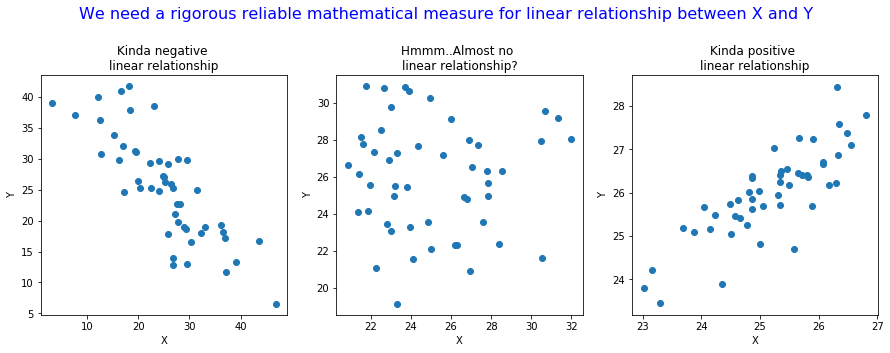

In [4]:
# easy generation of correlated random data
# https://stackoverflow.com/questions/16016959/scipy-stats-seed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

np.random.seed(seed=0)

def give_cov(corr, X, Y, n):
    means = [X.mean(), Y.mean()]  
    stds = [X.std() / 3, Y.std() / 3]
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 
    m = np.random.multivariate_normal(means, covs, n).T
    return m[0], m[1]
    
    
X = np.array([0, 50])
Y = np.array([0, 50])
n = 50

corr_l = [-0.8, 0, 0.8]
title = ['Kinda negative \nlinear relationship', 'Hmmm..Almost no \nlinear relationship?', 'Kinda positive \nlinear relationship']
fig, axarr = plt.subplots(1,3,figsize=(15,5))

for i in range(0, len(corr_l)):
    X , Y = give_cov(corr_l[i], X, Y, n)
    axarr[i].scatter(X, Y)
    axarr[i].title.set_text(title[i])
    axarr[i].set_xlabel('X')
    axarr[i].set_ylabel('Y')
    
plt.suptitle('We need a rigorous reliable mathematical measure for linear relationship between X and Y', color='blue', fontsize=16)
plt.subplots_adjust(top=0.79)
plt.show()


# What

#### Relationship Definition

Let X and Y be the random variables involved, and each point representing a $(x,y)$ pair value. What we want to see is, how is each point located with respect to every other point in the given sample set. Also we want to know if that is in a positive or negative way. Imagine a pair of points $(x_1,y_1)$ and $(x_2,y_2)$. Let $x_1$ and $x_2$ be in increasing order, then if $(y_2 > y_1)$ we could say, the pair is in a positive relationship. We could also sort $y_1,y_2,\cdots$ in increasing order, and then say if $x_2 > x_1$, then the pair is in a positive relationship. By positive we just mean, with increasing $x$ the $y$ increases. The negative relationship is defined simply the opposite of it, that is, with increasing $x$, the $y$ decreases. Or with increasing $y$, the $x$ decreases. Consequently, in terms of points we could say, given $y_1<y_2$ , if $x_1 > x_2$, then its a negative relationship. Summarizing we could stick to below convention, but one could try the alternate also. 


Given $(x_1, y_1),(x_2, y_2)$ and $y$ is in increasing order, i.e., $(y_1 < y_2)$,  
    if $(x_1 < x_2)$ or $(x_2 - x_1>0)$, this implies $x$ has increased with $y$, a positive relationship   
    if $(x_1 > x_2)$ or $(x_1 - x_2>0)$, this implies $x$ has decreased with $y$, a negative relationship  

#### Visual Quantification via Colored Rectangles

Now that we have defined the relationship, next should think about quantification. After all, what we seek is a _measure_, a quantification of the relationship. How could we quantitatively differentiate the defined relation between pairs say, $[(x_1,y_1),(x_2,y_2)]$ and $[(x_3,y_3),(x_4,y_4)]$? This could be approached with geometry. Imagine drawing a rectangle based on $[(x_1,y_1),(x_2,y_2)]$, say $R_{12}$ and $[(x_3,y_3),(x_4,y_4)]$, say $R_{34}$ separately. Then one rectangle's area would be smaller or larger than the other, indicating a quantified measure of how farther apart the points are comparitively. Also, we could color the area to indicate if the involved pair that is used to construct the rectangle is in a positive or negative relationship. To construct a rectangle out of two points $[(x_1,y_1),(x_2,y_2)]$, we could just consider them as a two oppositing corners of the rectangle, and simply draw one whose sides are parallel to the axes. Let us color green for a positive relationship and red for a negative relationship. Such a visual quantification is illustrated below. Note that, a certain transparency is maintained for each rectangle, so the overlapping does not hide any information, but simply transparent to us. 

In [5]:
preamble = '''
    \pgfplotsset{compat=1.15}
'''

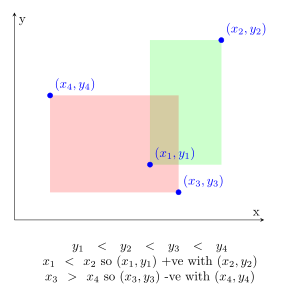

In [6]:
%%tikz -p pgfplots,pgfplotstable -x $preamble -f svg -s 300,300
\pgfplotstableread{
X Y label
2.2 14 $(x_1,y_1)$
2.7 23 $(x_2,y_2)$
2.4 12 $(x_3,y_3)$
1.5 19 $(x_4,y_4)$
}\datatable
    \begin{axis}[
        % legend pos=outer north east,
        xmin=1.25,xmax=3,ymin=10,ymax=25,
        ytick=\empty,xtick=\empty,
        xlabel={x},ylabel={y},
        clip=false, axis on top,grid = major,axis lines = middle,
        every node near coord/.append style={anchor=south west},
        ]
        \addplot [nodes near coords, only marks, blue, mark = *, point meta = explicit symbolic] table[meta = label] {\datatable};
        \coordinate (XYA) at (2.2, 14);
        \coordinate (XYB) at (2.7, 23);
        \coordinate (XYC) at (2.4, 12);
        \coordinate (XYD) at (1.5, 19);
        \draw [ultra thin, draw=green, fill=green, opacity=0.2]  (XYA) rectangle (XYB);
        \draw [ultra thin, draw=red, fill=red, opacity=0.2]  (XYC) rectangle (XYD);
        
        \node[below=0.50cm,align=center,text width=8cm] at (2.2,10)
        {
            $y_1<y_2<y_3<y_4$ \\ 
            $x_1<x_2$ so $(x_1,y_1)$ +ve with $(x_2,y_2)$ \\
            $x_3>x_4$ so $(x_3,y_3)$ -ve with $(x_4,y_4)$
        };
    
    \end{axis}

\begin{equation}
\text{Area of a rectangle,    } R_{ij} = (x_i - x_j)(y_i - y_j)  \label{eq:C001}
\end{equation}

# Area Distribution

Of course we have not drawn all possible combinations above for given set of points $(x_1,y_1), (x_2, y_2), (x_3, y_3), (x_4,y_4)$  to establish first the basic idea, but that is what we would do for any given set of points:Plot all such relationship rectangles for every point with every other point in the given sample. We want to know for each and every point in given set, its relationship with every other point, _quantitatively_. However there is a problem. 

>_If we try to plot for every possible pair of given set of data, there will be symmetrically distributed duplicity which not only introduces redundancy in the measure, but also neutrlizes our visualization_ 

That is, if $(x_i,y_i)$ is a positive relationship with $(x_j,y_j)$, it also means $(x_j,y_j)$ is in negative relationship with $x_i, y_i$ in other direction. Trying to take all possible rectangle will have this duality for all rectangles. For example, by iterated dual looping if at one iteration if $(x_i,y_i) = (1,2), (x_j,y_j) = (3,4)$, then down the line, when j takes i value, we have, $(x_i,y_i) = (3,4), (x_j,y_j = (1,2))$. In terms of rectangle notation, for every $R_{ij}$, there is $R_{ji}$ which is of equal value. 

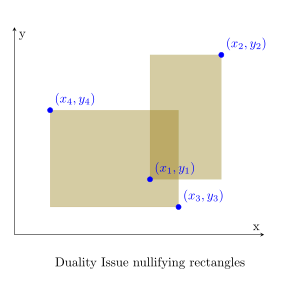

In [7]:
%%tikz -p pgfplots,pgfplotstable -x $preamble -f svg -s 300,300
\pgfplotstableread{
X Y label
2.2 14 $(x_1,y_1)$
2.7 23 $(x_2,y_2)$
2.4 12 $(x_3,y_3)$
1.5 19 $(x_4,y_4)$
}\datatable
    \begin{axis}[
        % legend pos=outer north east,
        xmin=1.25,xmax=3,ymin=10,ymax=25,
        ytick=\empty,xtick=\empty,
        xlabel={x},ylabel={y},
        clip=false, axis on top,grid = major,axis lines = middle,
        every node near coord/.append style={anchor=south west},
        ]
        \addplot [nodes near coords, only marks, blue, mark = *, point meta = explicit symbolic] table[meta = label] {\datatable};
        \coordinate (XYA) at (2.2, 14);
        \coordinate (XYB) at (2.7, 23);
        \coordinate (XYC) at (2.4, 12);
        \coordinate (XYD) at (1.5, 19);
        \draw [ultra thin, draw=green, fill=green, opacity=0.2]  (XYA) rectangle (XYB);
        \draw [ultra thin, draw=red, fill=red, opacity=0.2]  (XYB) rectangle (XYA);
        
        \draw [ultra thin, draw=green, fill=green, opacity=0.2]  (XYD) rectangle (XYC);
        \draw [ultra thin, draw=red, fill=red, opacity=0.2]  (XYC) rectangle (XYD);

        
        \node[below=0.50cm,align=center,text width=8cm] at (2.2,10)
        {
            Duality Issue nullifying rectangles
        };
    
    \end{axis}

Thus the flaw in the visualization already strongly suggests not to take all rectangles for the measure but may be, just half of it as representative of entire sample set. Below are the total number of rectangles for $N=6$ pairs of sample sets. The blue shaded is symmetrical to yellow shaded. This is why the measure would be inherently doubled if all rectangles are taken into account. By nature, it is not needed. Think about it. Taking all possible rectangles, simply means, looking for a linear relationship in one direction and then again, in reverse, and deciding that the relationship is null. We should instead decide to take in to account only one direction,which means, only half of below rectangles would sufficely give a measure of relationship in one direction. Also note the diagonal rectangles have zero area, thus can be neglected too. 

In [8]:
preamble = '''
    \pgfplotsset{compat=1.15}
'''

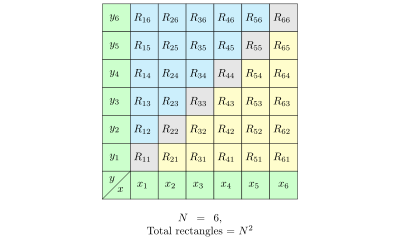

In [9]:
%%tikz -p pgfplots,pgfplotstable,xcolor -x $preamble -l matrix,positioning -f svg
\tikzset{%
square matrix/.style={
    matrix of nodes,
    column sep=-\pgflinewidth, 
    row sep=-\pgflinewidth,
    nodes in empty cells,
    nodes={draw,
      minimum size=#1,
      anchor=center,
      align=center,
      inner sep=0pt
    },
    column 1/.style={nodes={fill=green!20}},
    row 7/.style={nodes={fill=green!20}},
  },
  square matrix/.default=0.9cm
}
\newcommand{\tx}{|[fill=cyan!20]|}
\newcommand{\tb}{|[fill=yellow!20]|}
\newcommand{\tg}{|[fill=gray!20]|}

\matrix[square matrix] (A)
{
$y_6$ & \tx $R_{16}$ & \tx $R_{26}$ & \tx $R_{36}$ & \tx $R_{46}$ & \tx $R_{56}$ & \tg $R_{66}$ \\ 
$y_5$ & \tx $R_{15}$ & \tx $R_{25}$ & \tx $R_{35}$ & \tx $R_{45}$ & \tg $R_{55}$ & \tb $R_{65}$ \\
$y_4$ & \tx $R_{14}$ & \tx $R_{24}$ & \tx $R_{34}$ & \tg $R_{44}$ & \tb $R_{54}$ & \tb $R_{64}$ \\
$y_3$ & \tx $R_{13}$ & \tx $R_{23}$ & \tg $R_{33}$ & \tb $R_{43}$ & \tb $R_{53}$ & \tb $R_{63}$   \\ 
$y_2$ & \tx $R_{12}$ & \tg $R_{22}$ & \tb $R_{32}$ & \tb $R_{42}$ & \tb $R_{52}$ & \tb $R_{62}$ \\ 
$y_1$ & \tg $R_{11}$ & \tb $R_{21}$ & \tb $R_{31}$ & \tb $R_{41}$ & \tb $R_{51}$ & \tb $R_{61}$ \\ 
  & $x_1$ & $x_2$ & $x_3$ & $x_4$ & $x_5$ & $x_6$\\ 
};

\draw (A-7-1.north east)--(A-7-1.south west);
\node[below left=4mm and 1mm of A-7-1.north east] {$x$};
\node[above right=4mm and 1mm of A-7-1.south west] {$y$};


        \node[below=0.50cm,align=center,text width=4cm] at (0,-3)
        {
            $N=6$, \\ Total rectangles = $N^2$
        };

Thus, we would just go with only either blue or yellow rectangles as illustrated above. Let us look closer at the product $(x_i-x_j)(y_i-y_j)$ for all rectangles. The no of rectangles in the half we are interested in is given by $\dfrac{N(N-1)}{2}$. If $N=6$, you could observe we have $\dfrac{(6)(5)}{2} = 15$ rectangles as our interest out of $N^2 = 6^2 = 36$ rectangles. 

If we untangle the rectangle information systematically,we could come up with a summation to calculate the total value as below.  Let us consider the _yellow_ rectangles (you could try the blue ones)

* Let $i=1$, then $R_{12} + R_{13} + R_{14} + R_{15} + R_{16} = \sum\limits_{j=i+1}^6R_{1j}$  
* Let $i=2$, then $R_{23} + R_{24} + R_{25} + R_{26} = \sum\limits_{j=i+1}^6R_{2j}$  
* Let $i=3$, then $R_{34} + R_{35} + R_{36} = \sum\limits_{j=i+1}^6R_{3j}$  
* Let $i=4$, then $R_{45} + R_{46} = \sum\limits_{j=i+1}^6R_{4j}$  
* Let $i=5$, then $R_{56} = \sum\limits_{j=i+1}^6R_{5j}$  

We could thus consilidate the total area of our interest as, 

$$
\text{Total Interested Area, TIA} = \sum\limits_{i=1}^5\sum\limits_{j=i+1}^{6}R_{ij}
$$

When $i=6$, $j=i+1=7$, and there is no $R_{67}$, or $R_{67} = 0$, so we could rewrite slightly as,

$$
\text{TIA } = \sum\limits_{i=1}^6\sum\limits_{j=i+1}^{6}R_{ij}
$$

Using $\ref{eq:C001}$, and generalizing to $N$, 

\begin{equation}
    \text{TIA} = \sum\limits_{i=1}^N\sum\limits_{j=i+1}^{N}(x_i - x_j)(y_i - y_j) \label{eq:C002}
\end{equation}

_Alternate approach_: We instead could have taken all area, and then simply divided by 2. Here, the derivation is straight forward. For $N=6$, there are $N^2=36$ rectangles possible. And as indexed in last diagram, the total area would be, 

$$
\text{Total Area} = \sum\limits_{i=1}^N\sum\limits_{j=1}^NR_{ij}
$$

Using $\ref{eq:C001}$ and taking the half as that is our interested area, we get,

\begin{equation}
\text{TIA} = \dfrac{1}{2}\sum\limits_{i=1}^N\sum\limits_{j=1}^{N}(x_i - x_j)(y_i - y_j) \label{eq:C003}
\end{equation}

Both $\ref{eq:C002}$ and $\ref{eq:C003}$ are equivalent, but $\ref{eq:C002}$ gives a better intuition, what we are after. Let us take a closer look next at the rectangular area distribution. 